In [ ]:
# install pandas
# install matplotlib
# install scikit-learn


In [7]:
import pandas as pd
from matplotlib import pyplot as plt


In [28]:
import pandas as pd

url = "https://raw.githubusercontent.com/rashakil-ds/Linear-Regression-with-Python/main/nasdaq100.csv"

df = pd.read_csv(url, sep=';')
df


,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [24]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [25]:
df = df.drop(columns = ['Date'])

In [26]:
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

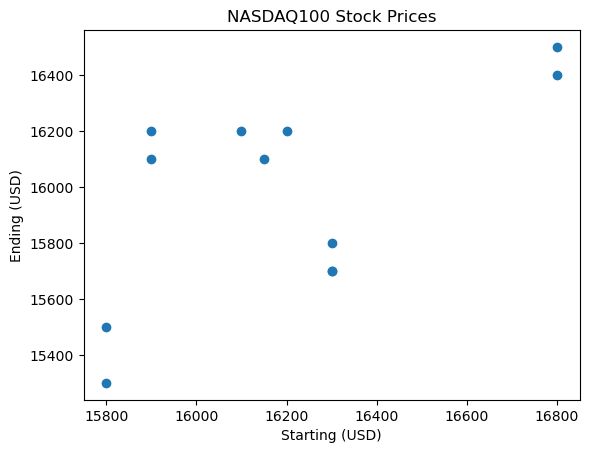

In [27]:
# scatter through te bole dici x-axis a ke thakbe and y-axis a ke thakbe. 
plt.scatter(df['Star ting (USD)'], df['Ending (USD)'])
# x axis a kicu likhte hole ai vabe korte hoy
plt.xlabel('Starting (USD)')
# y axis a kicu likhte hole ai vabe korte hoy
plt.ylabel('Ending (USD)')
# this is use for title
plt.title('NASDAQ100 Stock Prices')

In [29]:
# Linear Regression
# import korteci linearRegression from the sklearn

from sklearn.linear_model import LinearRegression


In [30]:
reg = LinearRegression()

In [33]:
x = df[['Starting (USD)']]
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [34]:
y = df['Ending (USD)']
y.mean()

np.float64(15975.0)

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

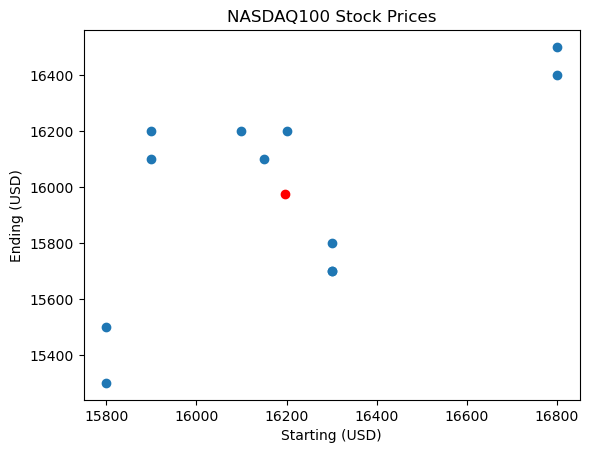

In [41]:
# y = mx+c ar kaj hoye jacce 
plt.scatter(x.mean(), y.mean(), color= 'red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [42]:
reg.fit(x,y) #train the ml model

LinearRegression()

In [44]:
m = reg.coef_
m

array([0.65258293])

In [46]:
c = reg.intercept_
c

np.float64(5405.875557022611)

In [47]:
# now check the liner regression formula. is it work or none

m*16700+c

array([16304.0105628])

In [49]:
# oi x value jonno amar y predicted value koto oi ta ber kore dey
reg.predict([[16700]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16304.0105628])

In [50]:
# how to find predicted y value references the actual y
df['Predicted_y'] = reg.predict(x)
df.head()

,Date,Starting (USD),Ending (USD),Predicted_y
0,01.01.24,16800,16500,16369.268856
1,01.12.23,15900,16100,15781.944215
2,01.11.23,15800,15300,15716.685922
3,01.10.23,16100,16200,15912.460802
4,01.09.23,16300,15700,16042.977389


In [52]:
df = df.drop(columns =['Date'])
df

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

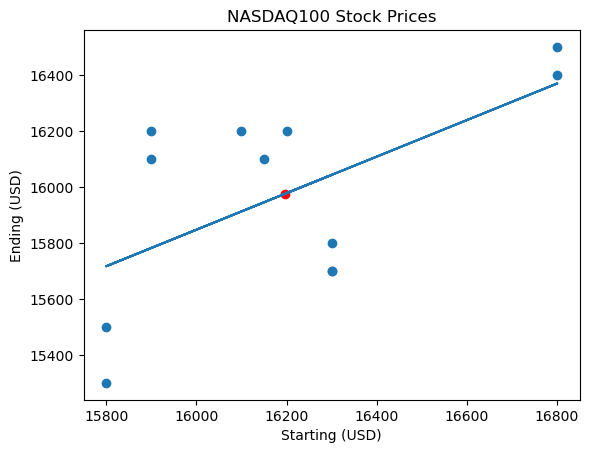

In [54]:
# plt.plot(x, df['Predicted_y'])
# x holo amar main value for x-axis and reg.predict(x) is predicted value for y-axis
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color= 'red')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [55]:
# calculate lose and cost function

df['lose'] = df['Ending (USD)'] - df['Predicted_y']
df

,Starting (USD),Ending (USD),Predicted_y,lose
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389
5,16800,16400,16369.268856,30.731144
6,15900,16200,15781.944215,418.055785
7,15800,15500,15716.685922,-216.685922
8,16150,16100,15945.089949,154.910051
9,16300,15800,16042.977389,-242.977389


In [57]:
# total cost find using MSE or MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [58]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [59]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

In [60]:
# manually find lose and cost value, funciton diye korle mae and manually korle ai vabe ber kora jay
sum(abs(df['lose'])) / len(x)

260.3840017604666

In [61]:
reg.score(x,y)

0.3577804940272571

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

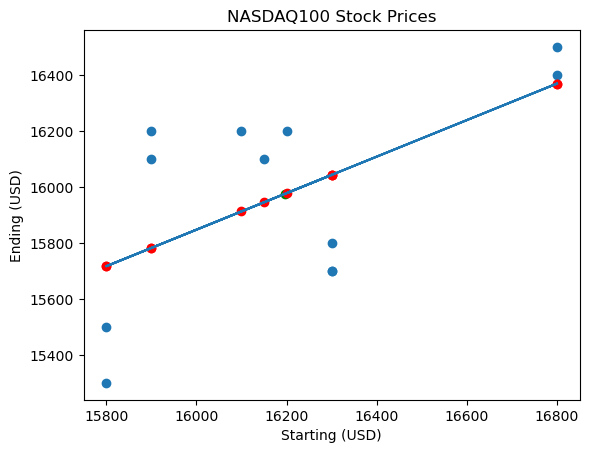

In [65]:
plt.plot(x, reg.predict(x))
plt.scatter(x.mean(), y.mean(), color= 'green')
plt.scatter(df['Starting (USD)'], df['Ending (USD)'])
plt.scatter(df['Starting (USD)'], df['Predicted_y'], color='red')
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')